# Задание №3

### Выделить и посчитать ложки и сахар

* Подключим необходимые библиотеки.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

* Загрузим изображение.

In [2]:
img = cv.imread(cv.samples.findFile('SpoonsAndSugar.png', cv.COLOR_BGR2GRAY))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [3]:
def show(image):
    plt.figure(figsize=(10,10))
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    #plt.title(text)
    plt.show()

* Исходное изображение.

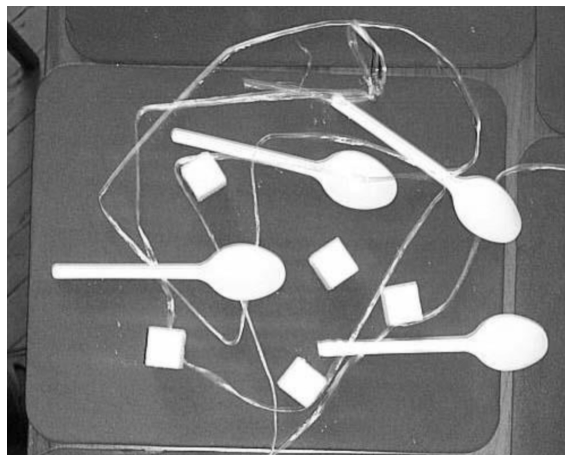

In [4]:
show(gray)

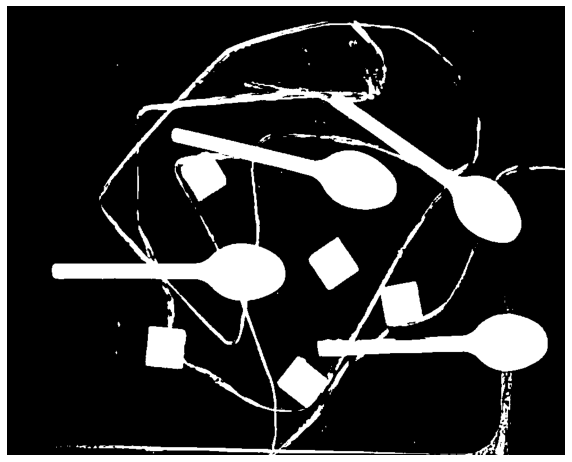

In [5]:
ret, thresh = cv.threshold(gray,150,255,cv.THRESH_BINARY)
show(thresh)

* Бинаризируем исходное изображение.

In [6]:
kernel = np.array([
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ], dtype=np.uint8)

* Удалим лишние шумы.

In [7]:
kernel = cv.getStructuringElement (cv.MORPH_ELLIPSE, (17,17))


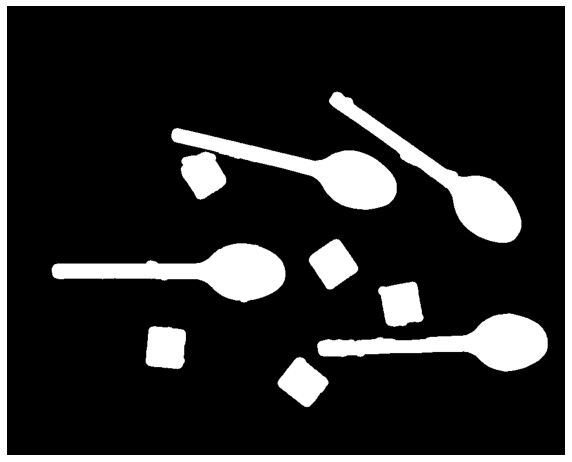

In [8]:
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 1)

#opening = cv.dilate(opening, kernel, iterations = 2)

show(opening)

* Посчитаем общее количество предметов.

In [9]:
All, markers = cv.connectedComponents(opening)
All = All-1
print('На исходном изображении: ', All, ' предметов.')

На исходном изображении:  9  предметов.


* Удалим сахар так, чтобы остались только ложки.

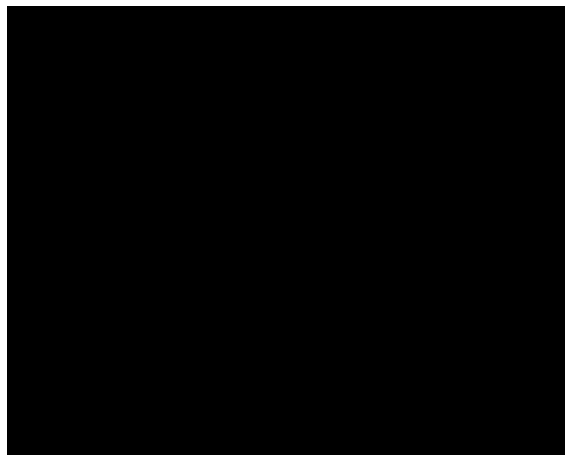

In [10]:
dil2 = cv.erode(opening, kernel, iterations = 42)
show(dil2)

In [11]:
Spoons, markers = cv.connectedComponents(dil2)
Spoons = Spoons-1
Sugar = All - Spoons

* Ответ:

In [12]:
print('Всего предметов: ', All, ', ложек: ', Spoons, ', сахара: ', Sugar)

Всего предметов:  9 , ложек:  0 , сахара:  9


* Выделим предметы.

In [13]:
kernel1 = np.array([
        [0, -1, 0],
        [-1, -1, -1],
        [0, -1, 0]
    ], dtype=np.uint8)

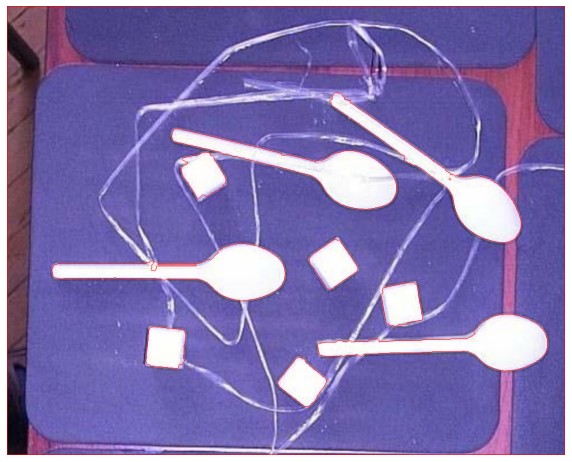

In [14]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.3*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(opening,sure_fg)
ret, markers = cv.connectedComponents(sure_fg)
markers = markers +1
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
gray = cv.cvtColor(img,cv.COLOR_BGR2RGB)
gray[markers == -1] = [255, 0, 0]
show(gray)